## Learned

### L-S strategy returns
- How to calculate returns of strategy == find NAV of portfolio at ALL times
- Compute returns from period-to-period

- Portfolio NAV == amount of money one will get if close out position == sell everything they own/ pay for everything they owe

- https://quant.stackexchange.com/questions/15530/calculation-of-returns-and-risk-metrics-for-l-s-portfolio

- https://quant.stackexchange.com/questions/44543/calculate-portfolio-return-with-one-long-position-and-one-short-position

- https://quant.stackexchange.com/questions/32513/calculating-the-returns-of-a-long-short-strategy

### Plotting

- How to plot 2 graphs in one - https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

- How to highlight specific values on a graph

https://stackoverflow.com/questions/8270981/in-a-matplotlib-plot-can-i-highlight-specific-x-value-ranges#8271438

https://stackoverflow.com/questions/55866957/using-axvspan-for-date-ranges-in-matplotlib



### Other
- Dataframe.copy()
- Need for strings + converting strings to datetime format


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

def loadData():
    df = pd.read_csv("usdZarData.csv")

    # 2 different risk free data sets. One includes holidays, the other does not
    riskFree = pd.read_csv("3moTbill.csv")
    riskFree2 = pd.read_csv("3moDeptofTreasury.csv")

    return df, riskFree, riskFree2

df, riskFree, riskFree2 = loadData()

In [3]:

def createDataTable(df):
    
    # create data table
    dataTable = df.merge(riskFree, left_on = 'Date', right_on= 'Date')
    zerosList = dataTable.shape[0]*[0]

    # Compute rolling window statistics

    movAvg = 15
    histVol = 90

    # def( movAvg, histVol):

    # create column titles
    maTitle = '{n}-day MA'.format(n = movAvg)
    volTitle = '{n}-day vol'.format(n = histVol)

    # add data to main table
    dataTable[maTitle] = dataTable.iloc[:,1].rolling(movAvg,min_periods = movAvg).sum()/movAvg
    dataTable[volTitle] = dataTable.iloc[:,1].rolling(histVol,min_periods = histVol).sum()/histVol

    return dataTable, zerosList

dataTable, zerosList = createDataTable(df)

In [29]:

def computeBaselineStrategy(dataTable, buyNusd, sellMusd, zerosList):
## Compute strategy

    dataTable['Signal'] = dataTable['USDZAR'] - dataTable['15-day MA']

    dataTable['Signal/ Noise'] = zerosList
    for i in range(0, len(dataTable)):
        dataTable.loc[i,'Signal/ Noise'] = dataTable.loc[i,'Signal']/ dataTable.loc[i,'90-day vol']

    dataTable['Baseline $ strategy'] = zerosList
    dataTable['Baseline ZAR strategy'] = zerosList

    for i in range(0, len(dataTable)):
            if dataTable['Signal'][i] > 0:
                # sell $, buy RAND
                dataTable.loc[i,'Baseline $ strategy'] = -buyNusd
                dataTable.loc[i,'Baseline ZAR strategy'] = sellMusd*dataTable.loc[i,'USDZAR']

            elif dataTable['Signal'][i] < 0:
                dataTable.loc[i,'Baseline $ strategy'] = buyNusd
                dataTable.loc[i,'Baseline ZAR strategy'] = -sellMusd*dataTable.loc[i,'USDZAR']

            else: 
                dataTable.loc[i,'Baseline $ strategy'] = 0
                dataTable.loc[i,'Baseline ZAR strategy'] = 0

    return dataTable


# define baseline strategy - mod(amount of dollar to buy or sell based on signal)
buyNusd = 1
sellMusd = 1

dataTable = computeBaselineStrategy(dataTable, buyNusd, sellMusd, zerosList)
dataTable.tail(20)

,Date,USDZAR,3mo_Tbill,15-day MA,90-day vol,Signal,Signal/ Noise,Baseline $ strategy,Baseline ZAR strategy
1262,07/04/2021,14.51,0.02,14.768667,14.897333,-0.258667,-0.017363,1,-14.51
1263,08/04/2021,14.54,0.01,14.764000,14.889111,-0.224000,-0.015045,1,-14.54
1264,09/04/2021,14.52,0.02,14.750000,14.881889,-0.230000,-0.015455,1,-14.52
1265,12/04/2021,14.58,0.02,14.734667,14.874889,-0.154667,-0.010398,1,-14.58
1266,13/04/2021,14.56,0.03,14.725333,14.868444,-0.165333,-0.011120,1,-14.56
1267,14/04/2021,14.49,0.02,14.699333,14.863111,-0.209333,-0.014084,1,-14.49
1268,15/04/2021,14.39,0.02,14.662000,14.856778,-0.272000,-0.018308,1,-14.39
1269,16/04/2021,14.14,0.02,14.604667,14.847667,-0.464667,-0.031296,1,-14.14
1270,19/04/2021,14.30,0.02,14.560000,14.839444,-0.260000,-0.017521,1,-14.30
1271,20/04/2021,14.21,0.03,14.513333,14.830667,-0.303333,-0.020453,1,-14.21


In [5]:
## compute performance of strategy
# Compute performance of chosen strategy

def createEmptyDataFrame(colNames, width, zeroList):

    stats = []
    # initialise empty data frame

    for i in range(0,width):
        stats.append(zerosList)
        #colNames.append(str(i))

    # add column names
    stats = pd.DataFrame(stats).transpose()
    stats.columns = colNames
    
    return stats

def computeWeightedStrategy(weightingSchemes, selectedWeightingScheme):

    weightingScheme = weightingSchemes[selectedWeightingScheme - 1]

    # check for NaNs + reomve. 
    droppedNAs = dataTable.dropna(axis = 0, how = 'any')
    droppedNAs.reset_index(inplace = True)

    # get weighted scheme + adjust if none
    if weightingScheme == 'None':
        weights = [1]*len(droppedNAs)
    else:
        weights = droppedNAs[weightingScheme]
    # get baseline strategy
    baselines = droppedNAs.loc[:,['Date','Baseline $ strategy', 'Baseline ZAR strategy'], ]

    # scale the baseline strategy in accordance with weights
    for i in range(0,len(weights)):
        baselines.iloc[i,1] =  weights[i] * baselines.iloc[i,1]
        baselines.iloc[i,2] =  weights[i]  * baselines.iloc[i,2]

    return baselines, droppedNAs


weightingSchemes = ['None', 'Signal', '90-day vol', 'Signal/ Noise']
selectedWeightingScheme = 1

baselines = pd.DataFrame()
baselines, droppedNAs = computeWeightedStrategy(weightingSchemes, selectedWeightingScheme)
baselines

,Date,Baseline $ strategy,Baseline ZAR strategy
0,06/09/2016,-1,14.38
1,07/09/2016,1,-13.99
2,08/09/2016,1,-14.00
3,09/09/2016,1,-14.12
4,12/09/2016,-1,14.38
...,...,...,...
1188,28/04/2021,-1,14.37
1189,29/04/2021,1,-14.20
1190,30/04/2021,1,-14.28
1191,03/05/2021,-1,14.46


In [6]:

def computeCumulativeMetrics(baselines, droppedNAs):
    
    # compute cumulative metrics
    baselines['Cumulative $'] = baselines.iloc[:,1].cumsum()
    baselines['Cumulative ZAR'] = baselines.iloc[:,2].cumsum()
    baselines['USDZAR'] = droppedNAs.loc[:,'USDZAR']

    # series division - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.divide.html
    baselines['Spot $ ZAR value'] = baselines['Cumulative ZAR'].divide(baselines['USDZAR'])
    baselines['Portfolio NAV'] = baselines['Spot $ ZAR value'] + baselines['Cumulative $']
    baselines['3mo_Tbill'] = droppedNAs.loc[:,'3mo_Tbill']

    return baselines

baselines = computeCumulativeMetrics(baselines, droppedNAs)
baselines

,Date,Baseline $ strategy,Baseline ZAR strategy,Cumulative $,Cumulative ZAR,USDZAR,Spot $ ZAR value,Portfolio NAV,3mo_Tbill
0,06/09/2016,-1,14.38,-1,14.38,14.38,1.000000,0.000000,0.32
1,07/09/2016,1,-13.99,0,0.39,13.99,0.027877,0.027877,0.34
2,08/09/2016,1,-14.00,1,-13.61,14.00,-0.972143,0.027857,0.35
3,09/09/2016,1,-14.12,2,-27.73,14.12,-1.963881,0.036119,0.35
4,12/09/2016,-1,14.38,1,-13.35,14.38,-0.928373,0.071627,0.37
...,...,...,...,...,...,...,...,...,...
1188,28/04/2021,-1,14.37,99,-1253.71,14.37,-87.244955,11.755045,0.01
1189,29/04/2021,1,-14.20,100,-1267.91,14.20,-89.289437,10.710563,0.01
1190,30/04/2021,1,-14.28,101,-1282.19,14.28,-89.789216,11.210784,0.01
1191,03/05/2021,-1,14.46,100,-1267.73,14.46,-87.671508,12.328492,0.04


In [7]:

def computePortfolioReturns(baselines):
    # compute portfolio returns
    returns = []

    for i,j in enumerate(baselines['Portfolio NAV']):
        if i == 0:
            returns.append('NaN')
        else:
            returns.append((j/baselines['Portfolio NAV'][i-1]) - 1)

    baselines['Portfolio returns'] = returns
    # baselines.columns
    return baselines

baselines = computePortfolioReturns(baselines)
baselines

<ipython-input-7-404281d39a9b>:9: RuntimeWarning: divide by zero encountered in double_scalars
  returns.append((j/baselines['Portfolio NAV'][i-1]) - 1)


,Date,Baseline $ strategy,Baseline ZAR strategy,Cumulative $,Cumulative ZAR,USDZAR,Spot $ ZAR value,Portfolio NAV,3mo_Tbill,Portfolio returns
0,06/09/2016,-1,14.38,-1,14.38,14.38,1.000000,0.000000,0.32,NaN
1,07/09/2016,1,-13.99,0,0.39,13.99,0.027877,0.027877,0.34,inf
2,08/09/2016,1,-14.00,1,-13.61,14.00,-0.972143,0.027857,0.35,-0.000714286
3,09/09/2016,1,-14.12,2,-27.73,14.12,-1.963881,0.036119,0.35,0.296579
4,12/09/2016,-1,14.38,1,-13.35,14.38,-0.928373,0.071627,0.37,0.983092
...,...,...,...,...,...,...,...,...,...,...
1188,28/04/2021,-1,14.37,99,-1253.71,14.37,-87.244955,11.755045,0.01,0.0555279
1189,29/04/2021,1,-14.20,100,-1267.91,14.20,-89.289437,10.710563,0.01,-0.0888539
1190,30/04/2021,1,-14.28,101,-1282.19,14.28,-89.789216,11.210784,0.01,0.0467035
1191,03/05/2021,-1,14.46,100,-1267.73,14.46,-87.671508,12.328492,0.04,0.0996994


In [8]:

def runStrategy(buyNusd, sellMusd, weightingSchemes,selectedWeightingScheme  ):
    
    df, riskFree, riskFree2 = loadData()
    
    # createDataTable
    dataTable, zerosList = createDataTable(df)

    # define baseline strategy - mod(amount of dollar to buy or sell based on signal)
    #buyNusd = 1
    #sellMusd = 1
    dataTable = computeBaselineStrategy(dataTable, buyNusd, sellMusd, zerosList)

    # compute weighted strategy
    baselines = pd.DataFrame()
    baselines, droppedNAs = computeWeightedStrategy(weightingSchemes, selectedWeightingScheme)
    
    # compute cumulative metrics
    baselines = computeCumulativeMetrics(baselines, droppedNAs)
    
    # compute portfolio returns
    baselines = computePortfolioReturns(baselines)

    return baselines

# Select portfolio weighting scheme
weightingSchemes = ['None', 'Signal', '90-day vol', 'Signal/ Noise']
selectedWeightingScheme = 1    # 1 == 'None'
    
#baselines = runStrategy()
#baselines.head(20)

## Plotting strategy

- We now proceed to compute some return statistics

- We also proceed to plot

In [9]:
def formatDate(baselines):
    
# Set date format
# https://stackoverflow.com/questions/37610983/how-set-column-as-date-index
    baselines['Date'] = pd.to_datetime(baselines['Date'], format = "%d/%m/%Y")
    baselines = baselines.set_index(['Date'])
    
    return baselines

baselines = formatDate(baselines)
print(baselines.head(5))


            Baseline $ strategy  Baseline ZAR strategy  Cumulative $  \
Date                                                                   
2016-09-06                   -1                  14.38            -1   
2016-09-07                    1                 -13.99             0   
2016-09-08                    1                 -14.00             1   
2016-09-09                    1                 -14.12             2   
2016-09-12                   -1                  14.38             1   

            Cumulative ZAR  USDZAR  Spot $ ZAR value  Portfolio NAV 3mo_Tbill  \
Date                                                                            
2016-09-06           14.38   14.38          1.000000       0.000000      0.32   
2016-09-07            0.39   13.99          0.027877       0.027877      0.34   
2016-09-08          -13.61   14.00         -0.972143       0.027857      0.35   
2016-09-09          -27.73   14.12         -1.963881       0.036119      0.35   
2016-09-1

In [10]:
def getNAVData(baselines):
    droppedBaselineNAs = baselines.iloc[2:,:]
    portfolioNAV = droppedBaselineNAs.loc[:,'Portfolio NAV']
    portfolioDates = droppedBaselineNAs.index
    underlying = droppedBaselineNAs.loc[:,'USDZAR']

    return portfolioNAV, portfolioDates, underlying, droppedBaselineNAs

#y, x, z, droppedBaselineNAs = getNAVData(baselines)
portfolioNAV, portfolioDates, underlying, droppedBaselineNAs = getNAVData(baselines)
portfolioNAV

Date
2016-09-08     0.027857
2016-09-09     0.036119
2016-09-12     0.071627
2016-09-13     0.062500
2016-09-14     0.088011
                ...    
2021-04-28    11.755045
2021-04-29    10.710563
2021-04-30    11.210784
2021-05-03    12.328492
2021-05-04    12.510007
Name: Portfolio NAV, Length: 1191, dtype: float64

In [11]:
    droppedBaselineNAs = baselines.iloc[2:,:]
    y = droppedBaselineNAs.iloc[:,6]
    x = droppedBaselineNAs.index
    underlying = droppedBaselineNAs.loc[:,'USDZAR']

In [12]:
def computeAllDrawdownStats(series):
    # compute drawdown duration

    
    storedDrawdowns = []
    sizeMaxDrawdownList = []
    maxDrawdownLocations = []
    drawDownStartList = []
    drawDownEndList = []
    # end
    
    for i in range(0, len(series)-1):
        #print(i)
        initialValue = series[i]
        comparison = series[i+1]
        count = 0
        
        drawdown = (comparison - initialValue)/ initialValue
        sizeMaxDrawdown = drawdown
        
        maxDrawdownLocation = 0
        
        if comparison > initialValue:
            sizeMaxDrawdown = 0
            maxDrawdownLocation = 0
        else:
        
        # stopping condition when sliding window hits end of series    
            while initialValue > comparison and i+ count +1 < len(series)-1:
                    
                    # compute new drawdown wrt start of window
                    drawdown = (comparison - initialValue)/ initialValue
                    
                    #print('drawing down')
                    if drawdown < sizeMaxDrawdown:
                        #print()
                        sizeMaxDrawdown = drawdown
                        maxDrawdownLocation = i+1+count

                    count += 1

                    #print('i is ' + str(i))
                    #print(i + 1 + count)
                    #print('max len is ' + str(len(series)))
                    # add 1 to counter --> shift windw
                    comparison = series[i+1 + count]
            #print(count)
        
        #get dates
        dates = series.index
        #dates = list(dates)
        
        maxDrawdownLocations.append(dates[maxDrawdownLocation])
        sizeMaxDrawdownList.append(sizeMaxDrawdown)
        storedDrawdowns.append(count)
        drawDownStartList.append(dates[i])
        drawDownEndList.append(dates[i+1+count])
        
        output = {"maxDrawdownLocations": maxDrawdownLocations,'sizeMaxDrawdownList': sizeMaxDrawdownList,
                 'storedDrawdowns': storedDrawdowns, 'drawDownStartIndex': drawDownStartList, 'drawDownEndIndex': drawDownEndList}
        
        output = pd.DataFrame(output)
        #output = [maxDrawdownLocations,sizeMaxDrawdownList,
        #          storedDrawdowns,drawDownStartList,drawDownEndList]
        
        #outputFrame = pd.DataFrame(output, columns = ['maxDrawdownLocations','sizeMaxDrawdownList', 'storedDrawdowns','drawDownStartList','drawDownEndList'])
        #print(i)
    return output

In [13]:
drawDownStats = computeAllDrawdownStats(portfolioNAV)
#type(portfolioNAV)
#y.index[0]
#y.iloc[0]
#y[0]

In [14]:
drawDownStats.head(145)


,maxDrawdownLocations,sizeMaxDrawdownList,storedDrawdowns,drawDownStartIndex,drawDownEndIndex
0,2016-09-08,0.000000,0,2016-09-08,2016-09-09
1,2016-09-08,0.000000,0,2016-09-09,2016-09-12
2,2016-09-08,-0.127427,1,2016-09-12,2016-09-14
3,2016-09-08,0.000000,0,2016-09-13,2016-09-14
4,2016-09-28,-4.373155,11,2016-09-14,2016-09-30
...,...,...,...,...,...
140,2016-09-08,0.153219,2,2017-03-23,2017-03-28
141,2016-09-08,0.081990,1,2017-03-24,2017-03-28
142,2016-09-08,0.000000,0,2017-03-27,2017-03-28
143,2016-09-08,0.000000,0,2017-03-28,2017-03-29


In [15]:

def extractKeyDrawdownStats(drawDownStats):
    
    # compute drawdown statistics
    d = drawDownStats
    
    # findMaxDrawdown location
    maxDrawdown = max(d.iloc[:,2])
    maxDrawDownDetails = d.loc[d.iloc[:,2]== maxDrawdown,:]

    minDrawdown = min(d.iloc[:,1])
    minDrawDownDetails = d.loc[d.iloc[:,1]== minDrawdown,:]

    index1 = maxDrawDownDetails.index[0]
    index2 = minDrawDownDetails.index[0]

    finalDrawDowns = d.iloc[[index1,index2],:]
    
    return finalDrawDowns

finalDrawDowns = extractKeyDrawdownStats(drawDownStats)
finalDrawDowns
    

,maxDrawdownLocations,sizeMaxDrawdownList,storedDrawdowns,drawDownStartIndex,drawDownEndIndex
307,2018-02-27,-2.376319,192,2017-11-14,2018-08-13
131,2017-03-27,-374.324032,14,2017-03-10,2017-03-31


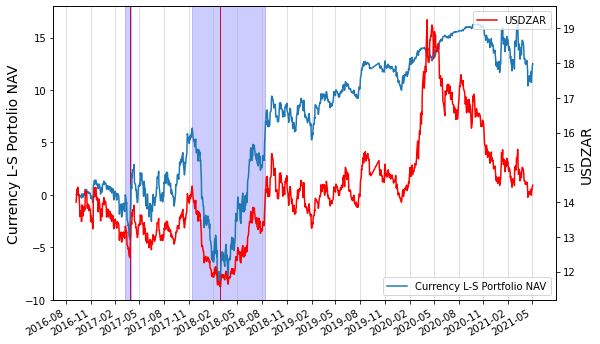

In [16]:
def plotGraphs(data, y, x, underlying):
    
    # convert date times to string for visualisation
    from datetime import datetime
    from matplotlib.dates import date2num
    import matplotlib.dates as mdates
    
    f, ax = plt.subplots(figsize=(9, 6))
    # https://stackoverflow.com/questions/8270981/in-a-matplotlib-plot-can-i-highlight-specific-x-value-ranges#8271438
    # https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html

    ax.plot(y)
    ax.grid(axis = 'x', alpha = 0.5)

    # Text in the x axis will be displayed in 'YYYY-mm' format.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.set_ylabel("Currency L-S Portolio NAV",fontsize=14)
    ax.legend(['Currency L-S Portfolio NAV'])

    for i in range(0,2):
        
        max2 = date2num(data.iloc[i,:][0])
        start2 = date2num(data.iloc[i,:][3])
        end2 = date2num(data.iloc[i,:][4])
        
        # plot max drawdown point and drawdown duration ranges
        ax.axvspan(max2, max2, color='red', alpha= 10)
        ax.axvspan(start2, end2, color='blue', alpha= 0.2)

    # Rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them.
    f.autofmt_xdate()
    
    # plot second axis - https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
    ax2 = ax.twinx()
    ax2.plot(underlying, color = "red")
    ax2.set_ylabel("USDZAR",fontsize=14)
    ax2.legend(['USDZAR'])
    
    fmt_half_year = mdates.MonthLocator(interval=3)
    ax2.xaxis.set_major_locator(fmt_half_year)

    # Minor ticks every month.
    fmt_month = mdates.MonthLocator(interval = 6)
    ax2.xaxis.set_minor_locator(fmt_month)
    
    plt.show()
    
plotGraphs(finalDrawDowns, portfolioNAV, portfolioDates, underlying)

In [18]:
def computeGraphs(baselines):
    
    # formatDates
    baselines = formatDate(baselines)
    
    # getNAVData
    portfolioNAV, portfolioDates, underlying, droppedBaselineNAs = getNAVData(baselines)
    
    # computeAllDrawdown Stats
    drawDownStats = computeAllDrawdownStats(portfolioNAV)

    # extract key drawdown stats
    finalDrawDowns = extractKeyDrawdownStats(drawDownStats)

    return finalDrawDowns, portfolioNAV, portfolioDates, underlying, baselines
    # plot graph
    
#finalDrawDowns, portfolioNAV, portfolioDates, underlying, baselines = computeGraphs(baselines)   
#plotGraphs(finalDrawDowns, portfolioNAV, portfolioDates, underlying)
    

## Sharpe ratio

In [19]:

def getTbillReturns(riskFree2):
    # Formatting the ates of risk free data. 
    # Dates are fiddley

    from datetime import datetime

    s = riskFree2

    for i in range(0,len(s)):
        
        # try-except needed as there as inconsistencies in the dates
        # https://www.w3schools.com/python/python_try_except.asp
        try:
            s.loc[i,'Date'] = pd.to_datetime(s.loc[i,'Date'], format = "%m/%d/%Y")
            #s.loc[i,'Date'] = datetime.strptime(s.loc[i,'Date'],"%m/%d/%Y")
        except:
            # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
            s.loc[i,'Date'] = pd.to_datetime(s.loc[i,'Date'], format = "%m/%d/%y")
            #s.loc[i,'Date'] = datetime.strptime(s.loc[i,'Date'],"%m/%d/%y")
    
    
    s = s.set_index(['Date'])

    # add returns column
    s['3mo_Tbill_returns'] = s.loc[:,'3mo_Tbill'].diff(1)
    
    return s

riskFree2 = pd.read_csv("3moDeptofTreasury.csv")
tBillsReturns = getTbillReturns(riskFree2)

tBillsReturns

,3mo_Tbill,3mo_Tbill_returns
Date,,
2016-04-04,0.23,NaN
2016-04-05,0.23,0.00
2016-04-06,0.23,0.00
2016-04-07,0.23,0.00
2016-04-08,0.23,0.00
...,...,...
2021-06-03,0.02,0.00
2021-06-04,0.02,0.00
2021-06-07,0.02,0.00


In [20]:
droppedBaselineNAs

,Baseline $ strategy,Baseline ZAR strategy,Cumulative $,Cumulative ZAR,USDZAR,Spot $ ZAR value,Portfolio NAV,3mo_Tbill,Portfolio returns
Date,,,,,,,,,
2016-09-08,1,-14.00,1,-13.61,14.00,-0.972143,0.027857,0.35,-0.000714286
2016-09-09,1,-14.12,2,-27.73,14.12,-1.963881,0.036119,0.35,0.296579
2016-09-12,-1,14.38,1,-13.35,14.38,-0.928373,0.071627,0.37,0.983092
2016-09-13,1,-14.24,2,-27.59,14.24,-1.937500,0.062500,0.36,-0.127427
2016-09-14,-1,14.43,1,-13.16,14.43,-0.911989,0.088011,0.33,0.408177
...,...,...,...,...,...,...,...,...,...
2021-04-28,-1,14.37,99,-1253.71,14.37,-87.244955,11.755045,0.01,0.0555279
2021-04-29,1,-14.20,100,-1267.91,14.20,-89.289437,10.710563,0.01,-0.0888539
2021-04-30,1,-14.28,101,-1282.19,14.28,-89.789216,11.210784,0.01,0.0467035


In [21]:
def computeSharpe(tBillsReturns, baselines):
    
# merge Tbills table with main data table  
# and extract portfolio NAVs and Tbills
    
    droppedBaselineNAs = baselines.iloc[2:,:]

    s = tBillsReturns
    s['Date2'] = s.index
    test = droppedBaselineNAs.copy()
    test['Date2'] = test.index

        # merge tables 
    merged = test.merge(s, how ='left', left_on = 'Date2', right_on = 'Date2')



    sharpeTable = merged.loc[:,['3mo_Tbill_y', '3mo_Tbill_returns','Portfolio returns', 'Portfolio NAV','Date2']]
    sharpeTable['Portfolio - Tbill returns'] = sharpeTable.loc[:,'Portfolio returns'] - sharpeTable.loc[:,'3mo_Tbill_returns']
    sharpeTable.head(5)

    # Using wiki definition - https://en.wikipedia.org/wiki/Sharpe_ratio
    meanPortfolioDailyReturn = sharpeTable['Portfolio - Tbill returns'].mean()
    portfolioDailyXsReturnStd = sharpeTable['Portfolio - Tbill returns'].std()

    dailySharpe = meanPortfolioDailyReturn/ portfolioDailyXsReturnStd
    annualisedSharpe = 365*dailySharpe/(252**0.5) 

    print('Annualised sharpe ratio: ' + str(annualisedSharpe))
    print('Daily sharpe ratio: ' + str(dailySharpe))

    return merged
    
merged = computeSharpe(tBillsReturns, baselines)



Annualised sharpe ratio: 0.368222050995677
Daily sharpe ratio: 0.016014640671529398


In [22]:

def computeTbillAndSharpe(baselines):
    
    riskFree2 = pd.read_csv("3moDeptofTreasury.csv")
    tBillsReturns = getTbillReturns(riskFree2)
    
    merged = computeSharpe(tBillsReturns, baselines)
    
    return merged

merged = computeTbillAndSharpe(baselines)


Annualised sharpe ratio: 0.368222050995677
Daily sharpe ratio: 0.016014640671529398


In [23]:
def plotTbill(merged):

    plt.plot(merged.loc[:,'Date2'], merged.loc[:,'3mo_Tbill_y'])
    plt.title('3mo Tbill Yield')


## Main script


<ipython-input-7-404281d39a9b>:9: RuntimeWarning: divide by zero encountered in double_scalars
  returns.append((j/baselines['Portfolio NAV'][i-1]) - 1)


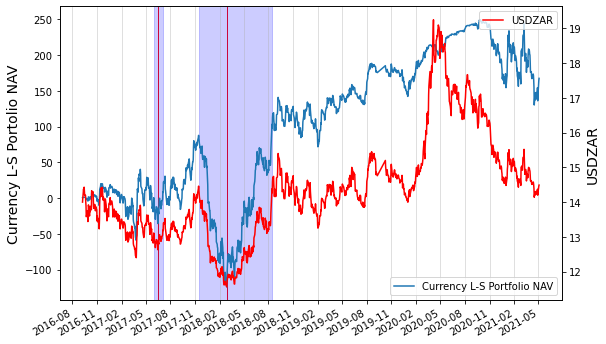

Annualised sharpe ratio: 0.8253438193094088
Daily sharpe ratio: 0.035895690279730275


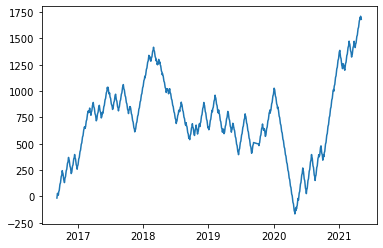

In [35]:

# Select portfolio weighting scheme
weightingSchemes = ['None', 'Signal', '90-day vol', 'Signal/ Noise']
selectedWeightingScheme = 3    # 1 == 'None'
buyNusd = 1
sellMusd = 1

baselines = runStrategy(buyNusd, sellMusd, weightingSchemes,selectedWeightingScheme  )

finalDrawDowns, portfolioNAV, portfolioDates, underlying, baselines = computeGraphs(baselines)   

plotGraphs(finalDrawDowns, portfolioNAV, portfolioDates, underlying)

merged = computeTbillAndSharpe(baselines)

finalDrawDowns
plt.plot(baselines.iloc[:,2])


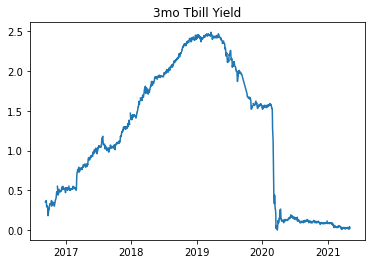

In [25]:
# plot Tbill yield

plotTbill(merged)

In [31]:
baselines.head()

,Baseline $ strategy,Baseline ZAR strategy,Cumulative $,Cumulative ZAR,USDZAR,Spot $ ZAR value,Portfolio NAV,3mo_Tbill,Portfolio returns
Date,,,,,,,,,
2016-09-06,-14.629333,210.369813,-14.629333,210.369813,14.38,14.629333,0.000000,0.32,NaN
2016-09-07,14.622111,-204.563334,-0.007222,5.806479,13.99,0.415045,0.407823,0.34,inf
2016-09-08,14.611556,-204.561778,14.604333,-198.755299,14.00,-14.196807,0.407526,0.35,-0.000726935
2016-09-09,14.602333,-206.184947,29.206667,-404.940246,14.12,-28.678488,0.528179,0.35,0.296061
2016-09-12,-14.597444,209.911251,14.609222,-195.028994,14.38,-13.562517,1.046705,0.37,0.981724


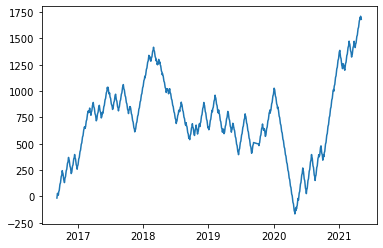

In [34]:
#plt.plot(baselines.iloc[])
plt.plot(baselines.iloc[:,2])

## Important results

### Point 1

- Very volatile strategy
- Large max drawdown window  ~ 8 months. Maintaining a losing position for this long would be difficult

### Assertion
- One would need to identify this change in regime and avoid trading into such events


### Point 2
- Largest drawdown los of ~6x one's funds

## Note on results

- We note that the strategy's E(ret) and Sharpe are greatly improved by scaling the position with volatility

- Using other schemes, such as scaling with signal strength worsen performance
- Scaling the signal with the inverse of volatility also worsens performance
- The result of this, is that scaling with using a signal/ noise metric also worsens performance

### Additional observation

- We see oberve periods of appreciable underperformance when the USDZAR exhibits trending behaviour


### Question
- Interestingly, the strategy did not lose much NAV when the USDZAR exhibited a strong upward trend in ~2020

- Why is this?


## Conjecture

- Visual inspection of the graphs and of the USDZAR reveals that it most frequently trades in a range

- This may imply that it tends to be a mean-reverting signal

- Could it be the case that volatility increases the likelihood of mean-reversion, which is why scaling position size with volatility works

- It may well be the case that trading into volatility by scaling positions proportionally with volatility works well with range-bounded signals 

If so,
- Considering signals that exhibit strong trends - the complement of mean-reverting signals, it may be possible to assert that  these signals favour low volatility environments, as volatility increases the likelihood of deviating from the desired trend